Some global variables:

In [167]:
datapath = '/data'
csv = 'TEAK_2017-06.csv'

Import modules.

In [168]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Read csv.

In [169]:
f = os.path.join(datapath, csv)
df = pd.read_csv(f, infer_datetime_format=True, index_col='timeBgn')

In [170]:
df.head()

,Unnamed: 0,data.fluxCo2.nsae.flux,qfqm.fluxCo2.nsae.qfFinl,data.fluxTemp.nsae.flux,qfqm.fluxTemp.nsae.qfFinl,data.fluxH2o.nsae.flux,qfqm.fluxH2o.nsae.qfFinl,soilCO2concentrationMean_z501h001,soilCO2concentrationMinimum_z501h001,soilCO2concentrationMaximum_z501h001,...,soilTempStdErMean_z508h004,finalQF_z508h004,soilTempMean_z509h004,soilTempMinimum_z509h004,soilTempMaximum_z509h004,soilTempVariance_z509h004,soilTempNumPts_z509h004,soilTempExpUncert_z509h004,soilTempStdErMean_z509h004,finalQF_z509h004
timeBgn,,,,,,,,,,,,,,,,,,,,,
2018-06-18 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,594.89,579.63,604.83,...,0.000274,0,6.159,6.152,6.167,0.000011,179.0,0.139,0.000246,0
2018-06-18 00:30:00,2,NaN,NaN,NaN,NaN,NaN,NaN,602.04,591.72,611.56,...,0.000222,0,6.160,6.153,6.167,0.000008,180.0,0.139,0.000217,0
2018-06-18 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,608.50,598.89,615.94,...,0.000196,0,6.161,6.154,6.168,0.000007,180.0,0.139,0.000196,0
2018-06-18 01:30:00,4,NaN,NaN,NaN,NaN,NaN,NaN,624.83,607.65,643.27,...,0.000731,0,6.163,6.133,6.186,0.000117,180.0,0.139,0.000806,0
2018-06-18 02:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,653.51,636.40,672.20,...,0.000262,0,6.164,6.155,6.174,0.000014,180.0,0.139,0.000282,0


Drop points with bad qf flags for any of the data.

In [171]:
qfs = [col for col  in df.columns if  ('.qfFin' in col) or ('finalQF' in col)]
b4 = len(df)
df = df.loc[df[qfs].any(axis=1)]
df = df.drop(columns=qfs)
drpd = b4-len(df)
print(f'dropped {drpd} out of {b4} entries ({round(100*drpd/b4, 2)} %) due to bad QF')

dropped 575 out of 25152 entries (2.29 %) due to bad QF


### CO2 flux

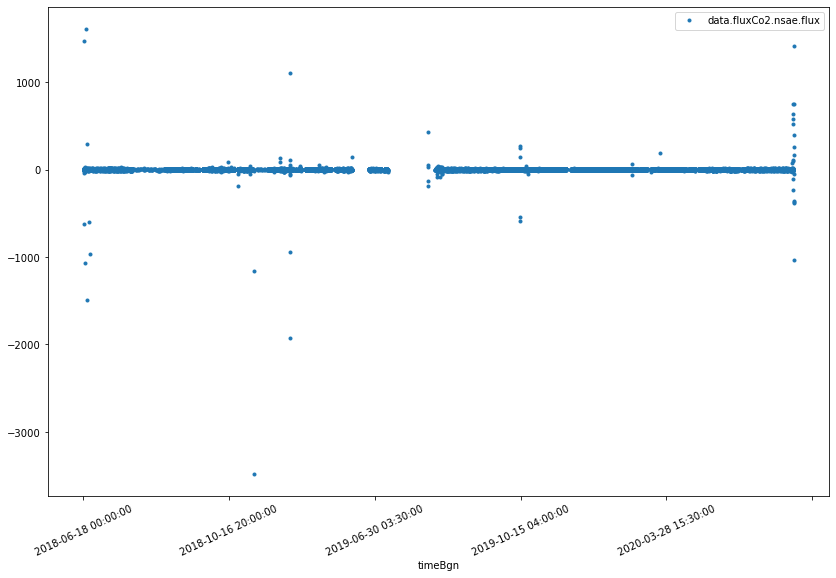

In [173]:
col = 'data.fluxCo2.nsae.flux'
df.plot(y=col, figsize=(14,9), style = '.');
plt.xticks(rotation=25);

Looks like there are outliers. lets trim them off.

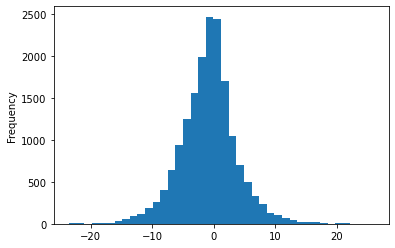

In [174]:
# cut off data outside of 99.5%
l = df[col].quantile(0.0025)
h = df[col].quantile(0.9975)
flx = df.loc[(df[col]<h) & (df[col]>l)][col]

# plot hist
kwargs = {'bins': 40}
flx.plot(kind='hist', **kwargs);

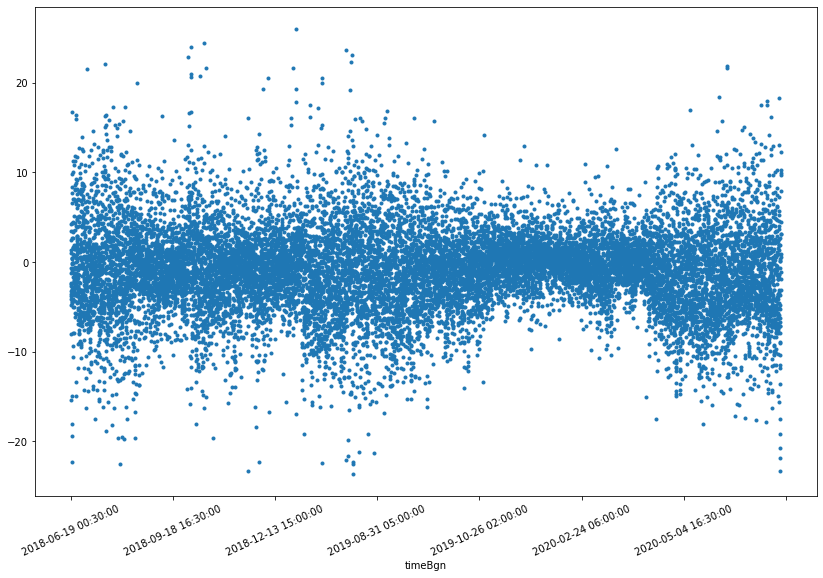

In [175]:
flx.plot( figsize=(14,9), style = '.', );
plt.xticks(rotation=25);

### Heat flux###

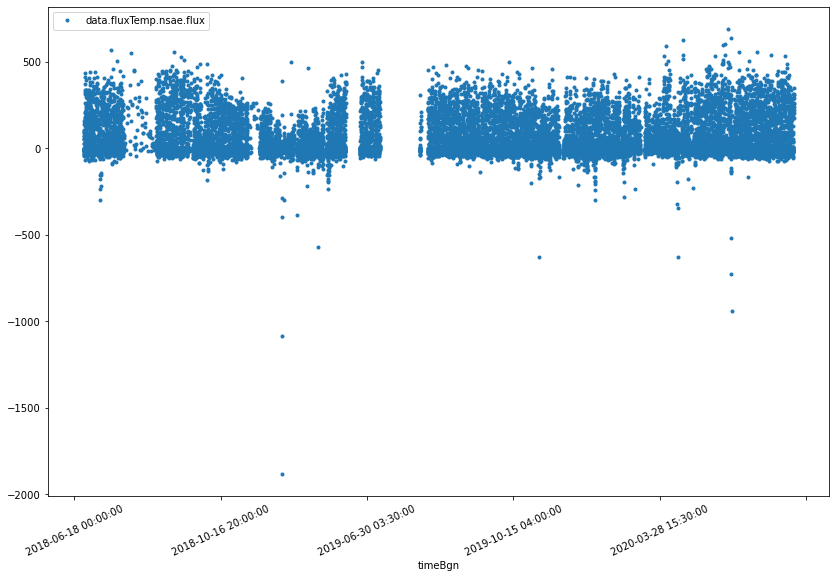

In [176]:
col = 'data.fluxTemp.nsae.flux'
df.plot(y=col, figsize=(14,9), style = '.');
plt.xticks(rotation=25);

Again, outliers.

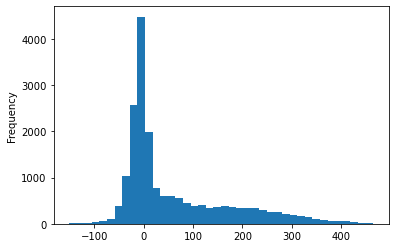

In [177]:
# cut off data outside of 99.5%
l = df[col].quantile(0.0025)
h = df[col].quantile(0.9975)
flx = df.loc[(df[col]<h) & (df[col]>l)][col]

# plot hist
kwargs = {'bins': 40}
flx.plot(kind='hist', **kwargs);

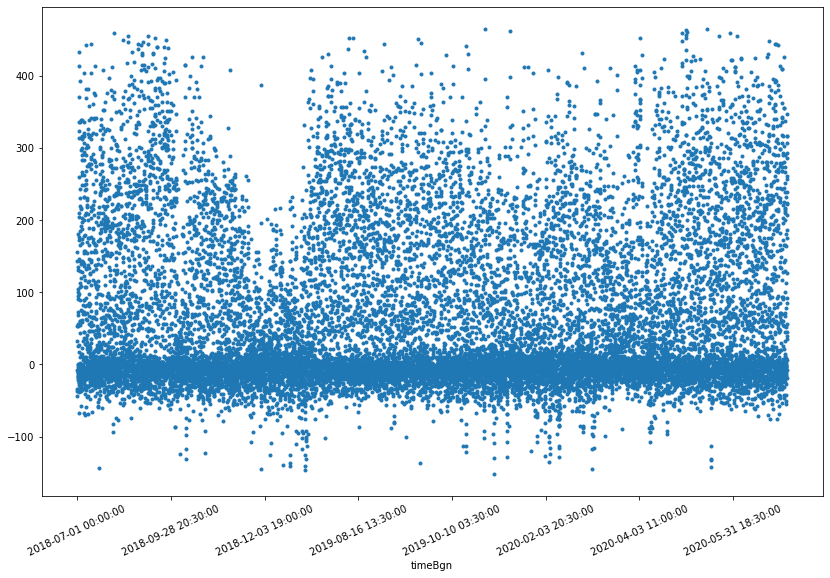

In [178]:
flx.plot(y=col, figsize=(14,9), style = '.');
plt.xticks(rotation=25);

### H2O flux

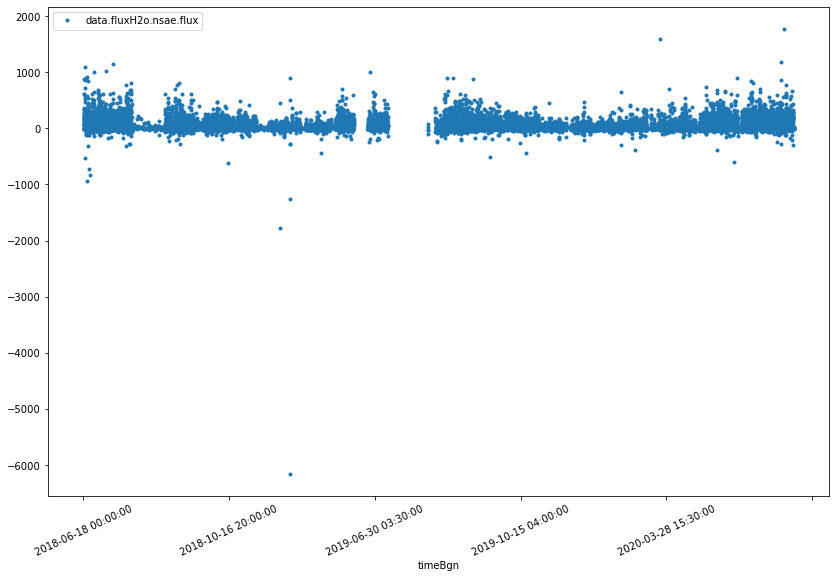

In [179]:
col = 'data.fluxH2o.nsae.flux'
df.plot(y=col, figsize=(14,9), style = '.');
plt.xticks(rotation=25);

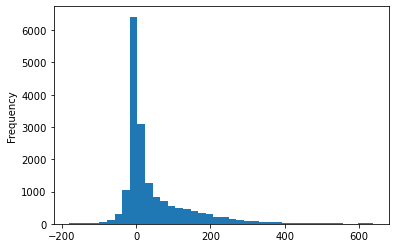

In [180]:
# cut off data outside of 99.5%
l = df[col].quantile(0.0025)
h = df[col].quantile(0.9975)
flx = df.loc[(df[col]<h) & (df[col]>l)][col]

# plot hist
kwargs = {'bins': 40}
flx.plot(kind='hist', **kwargs);

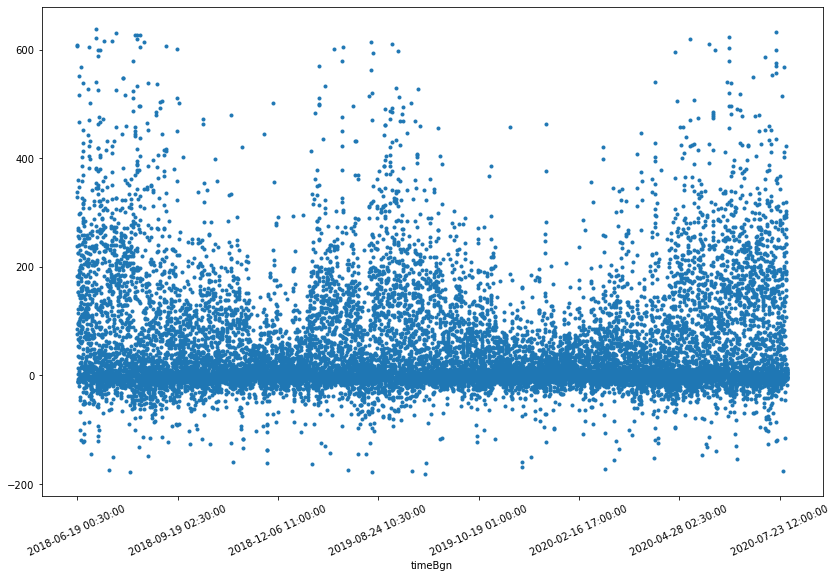

In [181]:
flx.plot(y=col, figsize=(14,9), style = '.');
plt.xticks(rotation=25);

### a general flux cleaning function
For the three fluxes above trimming off the outermost 0.5% of data seems to be aresonable way of gettign rid of outliers.

In [182]:
def fluxtrim(df):
    '''Drops outliers by confining the flux data to the central 99.5%'''
    cols = [col for col  in df.columns if  '.nsae.flux' in col]
    for col in cols:
        l = df[col].quantile(0.0025)
        h = df[col].quantile(0.9975)
        df = df.loc[(df[col]<h) & (df[col]>l)]
        print(len(df))   
    return(df)

### Soil sensor data

For each sensor we have the following data:

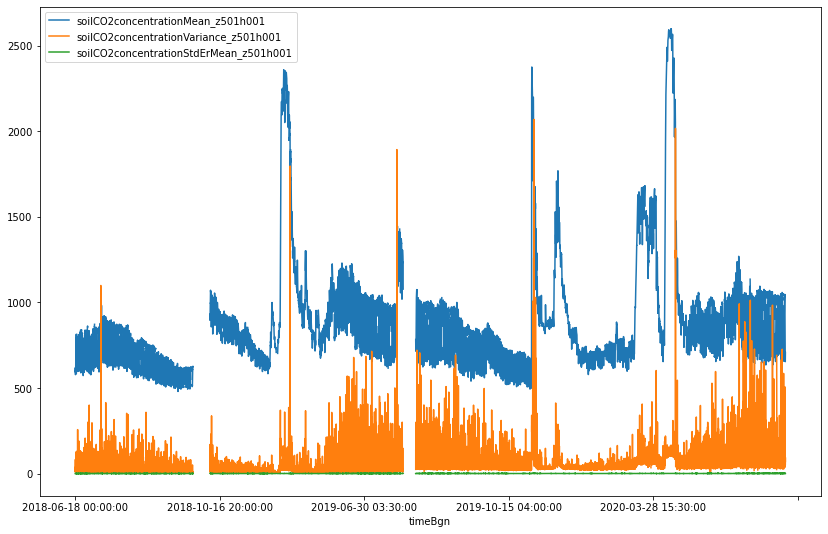

In [204]:
cols = [col for col in df.columns if ('z501h001' in col) and ('CO2' in col) and (('Mean' in col) or ('Variance' in col) or ('StdErMean' in col))]
df.plot(y=cols, figsize=(14,9));

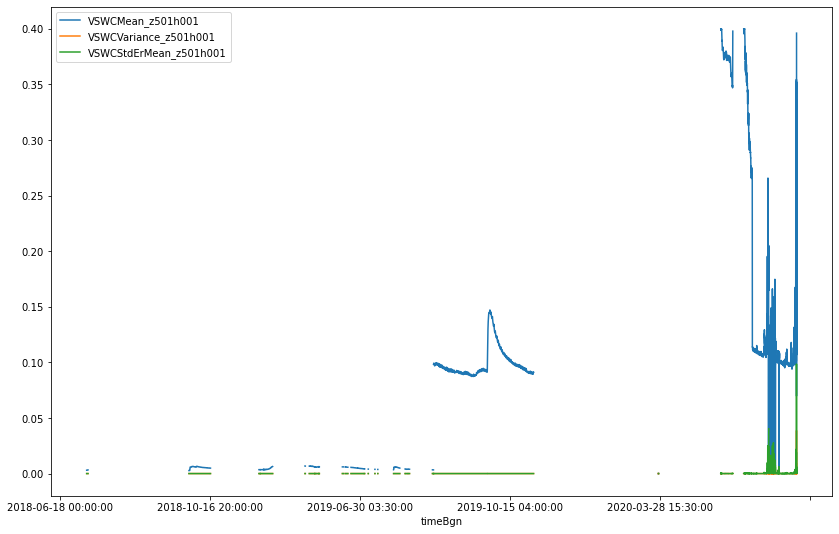

In [205]:
cols = [col for col in df.columns if ('z501h001' in col) and ('VSWC' in col) and (('Mean' in col) or ('Variance' in col) or ('StdErMean' in col))]
df.plot(y=cols, figsize=(14,9));

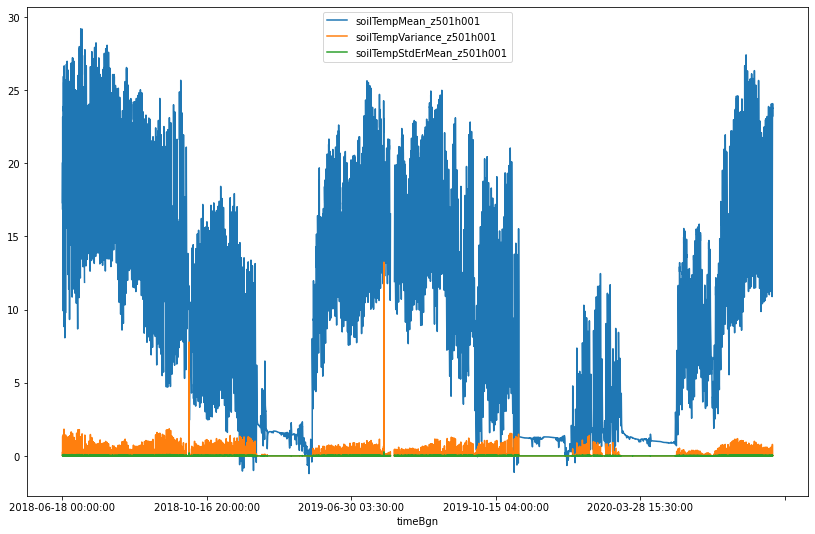

In [206]:
cols = [col for col in df.columns if ('z501h001' in col) and ('Temp' in col) and (('Mean' in col) or ('Variance' in col) or ('StdErMean' in col))]
df.plot(y=cols, figsize=(14,9));

cols = [col for col in df.columns if ('z501h001' in col) and ('CO2' in col) and (('Mean' in col) or ('Variance' in col) or ('StdErMean' in col))]
df.plot(y=cols, figsize=(14,9));

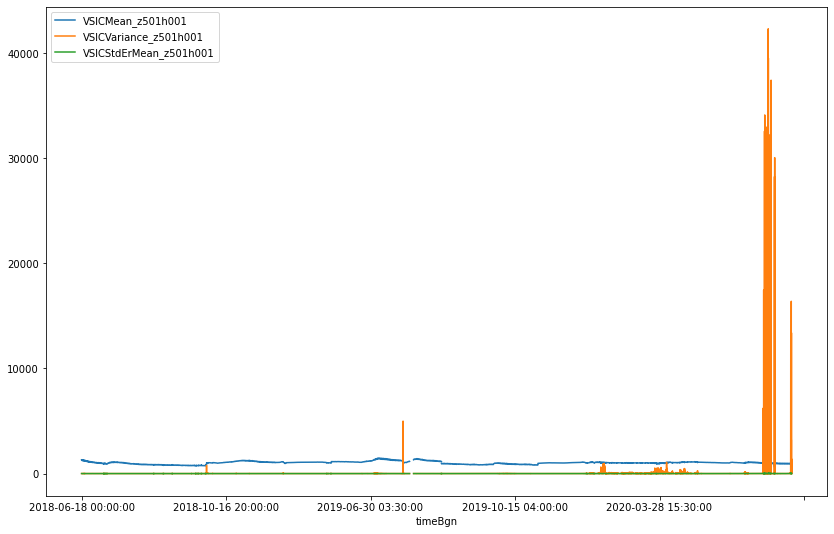

In [215]:
cols = [col for col in df.columns if ('z501h001' in col) and ('VSIC' in col) and (('Mean' in col) or ('Variance' in col) or ('StdErMean' in col))]
df.plot(y=cols, figsize=(14,9));

For now we have no interest in the salinity (VSIC).  Also note that there quite a bit of missing data for volumetric soil water content (VSWC). Lets lokk at all depths for that sensor array.

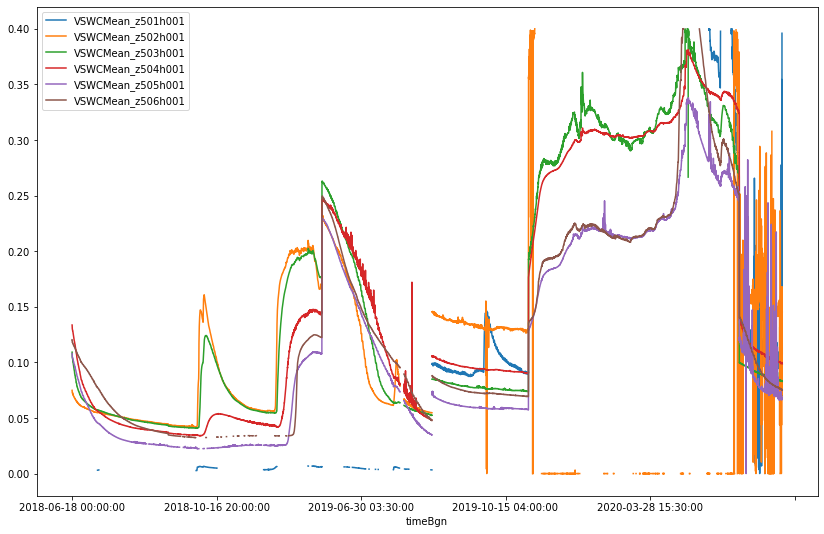

In [218]:
cols = [col for col in df.columns if ('h001' in col) and ('VSWC' in col) and ('CMean' in col)]
df.plot(y=cols, figsize=(14,9));

Ug! Zoom in on a troublesome spot.

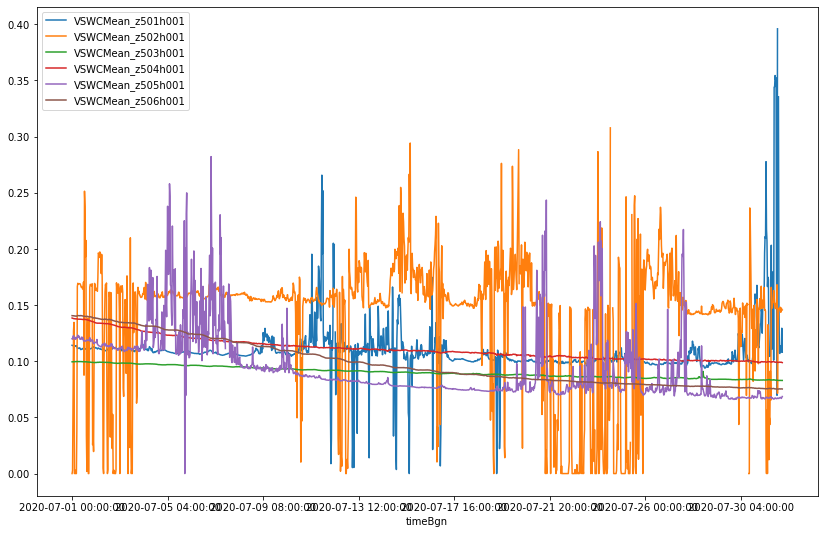

In [222]:
cols = [col for col in df.columns if ('h001' in col) and ('VSWC' in col) and ('CMean' in col)]
df.loc[df.index > '2020-06'].plot(y=cols, figsize=(14,9));

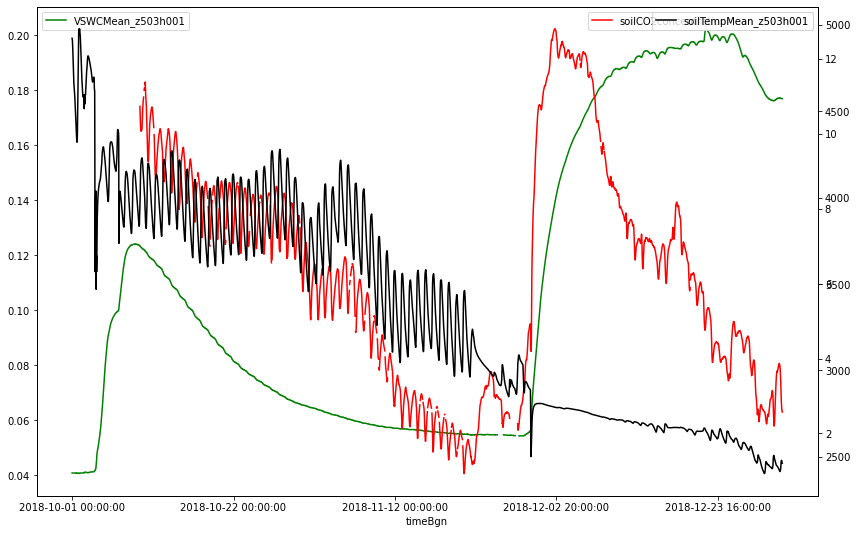

In [235]:
vswc_cols = [col for col in df.columns if ('z503h001' in col) and ('VSWCMean' in col)]
co2_cols = [col for col in df.columns if ('z503h001' in col) and('CO2concentrationMean' in col)]
T_cols = [col for col in df.columns if ('z503h001' in col) and('TempMean' in col)]

fig, ax = plt.subplots()
axx = ax.twinx()
axxx = ax.twinx()
df.loc[(df.index > '2018-10') & (df.index < '2019-02')].plot(ax=ax, y=vswc_cols, figsize=(14,9), color='g');
df.loc[(df.index > '2018-10') & (df.index < '2019-02')].plot(ax=axx, y=co2_cols, figsize=(14,9), color='r');
df.loc[(df.index > '2018-10') & (df.index < '2019-02')].plot(ax=axxx, y=T_cols, figsize=(14,9), color='k');

In [236]:
!cp flux.ipynb /data/TEAK_flux.ipynb

In [213]:
for col in df.columns:
    if ('SW'  not in col) and ('CO2' not in col):
        print(col)

Unnamed: 0
data.fluxCo2.nsae.flux
data.fluxTemp.nsae.flux
data.fluxH2o.nsae.flux
VSICMean_z501h001
VSICMinimum_z501h001
VSICMaximum_z501h001
VSICVariance_z501h001
VSICNumPts_z501h001
VSICExpUncert_z501h001
VSICStdErMean_z501h001
VSICFinalQF_z501h001
VSICMean_z501h002
VSICMinimum_z501h002
VSICMaximum_z501h002
VSICVariance_z501h002
VSICNumPts_z501h002
VSICExpUncert_z501h002
VSICStdErMean_z501h002
VSICFinalQF_z501h002
VSICMean_z501h003
VSICMinimum_z501h003
VSICMaximum_z501h003
VSICVariance_z501h003
VSICNumPts_z501h003
VSICExpUncert_z501h003
VSICStdErMean_z501h003
VSICFinalQF_z501h003
VSICMean_z501h004
VSICMinimum_z501h004
VSICMaximum_z501h004
VSICVariance_z501h004
VSICNumPts_z501h004
VSICExpUncert_z501h004
VSICStdErMean_z501h004
VSICFinalQF_z501h004
VSICMean_z501h005
VSICMinimum_z501h005
VSICMaximum_z501h005
VSICVariance_z501h005
VSICNumPts_z501h005
VSICExpUncert_z501h005
VSICStdErMean_z501h005
VSICFinalQF_z501h005
VSICMean_z502h001
VSICMinimum_z502h001
VSICMaximum_z502h001
VSICVariance_z